In [1]:
using Pkg
Pkg.activate("..")


  Activating project at `~/Research/RegionalSpanish`


In [2]:
using Plots, StatsBase, CodecZlib, CSV, DataFrames, LinearAlgebra, Formatting, Latexify, JLD2


In [3]:
VOC = CSV.read("../data/SpanishLang/voc/ALL.tsv.gz", DataFrame, delim='\t')

Row,token,occs,ndocs,weight,n_regions,country_codes
,String,Int64,Int64,Float64,Int64,String
1,fueron,1007329,986267,8.65527,25,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
2,",",198582423,133250538,1.57732,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
3,salir,2821137,2755970,7.17276,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
4,pero,29588164,28784422,3.78811,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
5,dormir,3754460,3646554,6.76879,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
6,las,35857087,32046472,3.63323,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
7,chau,409398,387910,10.0015,25,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
8,siento,2830971,2764088,7.16852,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
9,ganas,4624814,4534858,6.45426,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE


In [4]:
#VOC |> @filter(_.token == "cantina") |> DataFrame
#=
subset(VOC, :token => t -> t .== "zopilote") |> display
subset(VOC, :token => t -> t .== "xoloescuincle") |> display
subset(VOC, :token => arr -> [t in ("guajolote", "pavo") for t in arr]) |> display
=#

In [5]:
X = [1]
Y = [size(VOC, 1)]

C = VOC

for min_count in 2:26
    C = subset(C, :n_regions => c -> c .> min_count)
    push!(X, min_count)
    push!(Y, size(C, 1))
end


┌ Info: [(1, 1268420), (2, 379143), (3, 302612), (4, 253685), (5, 218203), (6, 190432), (7, 167613), (8, 148445), (9, 131798), (10, 117963), (11, 105880), (12, 95728), (13, 86902), (14, 79079), (15, 72110), (16, 65710), (17, 59680), (18, 53992), (19, 48822), (20, 43609), (21, 38319), (22, 31882), (23, 20811), (24, 11718), (25, 1056), (26, 0)]
└ @ Main In[8]:1


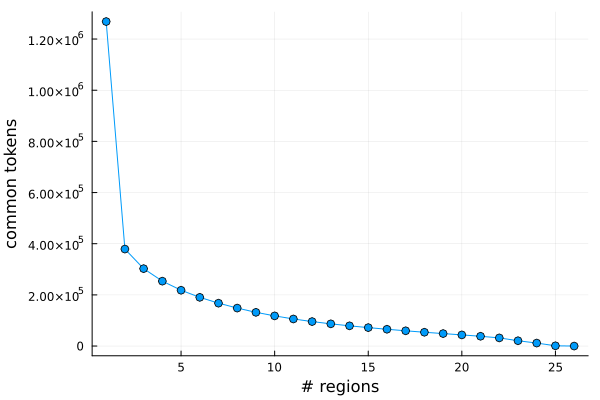

In [8]:
@info collect(zip(X, Y))
plot(X, Y, ylabel="common tokens", xlabel="# regions", m=:o, label="")
savefig("../figs/fig-common-tokens-per-region.pdf")
savefig("../figs/fig-common-tokens-per-region.png")
plot!(fmt=:png, xticks=:all)

In [10]:
C = subset(VOC, :n_regions => c -> c .>= 10)
sort!(C, :n_regions, by=last, rev=true)
first(C, 10) |> display
last(C, 10) |> display

Row,token,occs,ndocs,weight,n_regions,country_codes
,String,Int64,Int64,Float64,Int64,String
1,",",198582423,133250538,1.57732,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
2,salir,2821137,2755970,7.17276,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
3,pero,29588164,28784422,3.78811,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
4,dormir,3754460,3646554,6.76879,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
5,las,35857087,32046472,3.63323,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
6,siento,2830971,2764088,7.16852,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
7,ganas,4624814,4534858,6.45426,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
8,se,65455156,58105334,2.77472,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE
9,me,96836816,80037599,2.31272,26,AR:BO:BR:CA:CL:CO:CR:CU:DO:EC:ES:FR:GB:GQ:GT:HN:MX:NI:PA:PE:PR:PY:SV:US:UY:VE


Row,token,occs,ndocs,weight,n_regions,country_codes
,String,Int64,Int64,Float64,Int64,String
1,orinoo,105,105,21.8458,10,CO:CR:EC:ES:GT:MX:NI:PE:US:VE
2,aguaje,935,922,18.7175,10,CO:DO:EC:ES:MX:PA:PE:PR:US:VE
3,cizanoso,354,352,20.1054,10,CO:CR:EC:MX:NI:PA:PE:SV:US:VE
4,colochos,1224,1199,18.3387,10,CO:CR:ES:GT:HN:MX:NI:PE:SV:US
5,ahueve,421,420,19.8509,10,CO:CR:EC:GT:HN:MX:NI:PA:SV:US
6,alternabilidad,576,567,19.4184,10,CO:CR:DO:EC:ES:GT:HN:PA:US:VE
7,fresean,674,670,19.1778,10,CO:CR:EC:GT:HN:MX:NI:SV:US:VE
8,peptobismol,188,187,21.0161,10,CO:CR:DO:GT:MX:NI:PA:SV:US:VE
9,aleluyos,142,140,21.4325,10,CO:CR:EC:GT:MX:PA:PE:PY:US:VE
